# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
#importing libraries

import numpy as np  
import pandas as pd  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
from sklearn.model_selection import train_test_split

In [3]:
# Your code here - load the dataset
ames = pd.read_csv('ames.csv', index_col=0)


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [5]:
# Your code here - drop columns with missing data
ames_df = ames.dropna(axis=1)
ames_df.shape


(1460, 61)

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [6]:
target = 'SalePrice'
#continuous numeric predictors
numeric_predictors = ames_df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_predictors)


['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [8]:
# Your code here - continuous numeric predictor
numeric_pred = ames.select_dtypes(include=['int64', 'float64'])

# Now manually pick continuous ones (ignoring categorical features like 'Id', 'MSSubClass')
continuous_predictors = [col for col in numeric_pred.columns if col not in ['Id', 'MoSold', 'YrSold', 'MSSubClass', 'MiscVal']]

# Display the continuous predictors
continuous_predictors


['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice']

### Discrete Numeric Predictor

In [9]:
# Your code here - discrete numeric predictor
# Select only numeric columns (integers and floats)
numeric_discrete = ames.select_dtypes(include=['int64', 'float64'])

# Find discrete numeric predictors: 
# These usually have a small number of distinct values (like counts or categories)
discrete_predictors = [col for col in numeric_discrete.columns if numeric_discrete[col].nunique() <= 20]

# Display the discrete numeric predictors
discrete_predictors


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

### String Categorical Predictor

In [10]:
# Your code here - string categorical predictor

# Select only object (string) columns
string_cols = ames.select_dtypes(include=['object'])

# Display the string categorical predictors
string_cols.columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Discrete Categorical Predictor

In [11]:
# Your code here - discrete categorical predictor
# Select only integer columns
int_cols = ames.select_dtypes(include=['int64'])

# Find discrete categorical predictors: These usually have a small number of distinct values
discrete_categorical_predictors = [col for col in int_cols.columns if int_cols[col].nunique() <= 20]

# Display the discrete categorical predictors
discrete_categorical_predictors


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [13]:
# Your code here - continuous categorical predictor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Prepare X and y
# For X, choose relevant predictors (continuous, discrete categorical, and string categorical)
X = ames[['LotArea', 'GrLivArea', 'GarageArea', 'TotRmsAbvGrd', 'MSSubClass', 'OverallQual', 'OverallCond', 'MSZoning', 'Street']]
y = ames['SalePrice']

# 2. One-hot encode the categorical features (e.g., 'MSZoning', 'Street')
categorical_cols = ['MSZoning', 'Street']  # Example categorical columns to one-hot encode

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a preprocessing pipeline: One-hot encoding for categorical columns and no transformation for others
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', [col for col in X.columns if col not in categorical_cols])  # Leave numeric columns unchanged
    ])

# 5. Create a pipeline that first applies preprocessing, then fits the linear regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 6. Fit the model
model_pipeline.fit(X_train, y_train)

# 7. Predict on the test set
y_pred = model_pipeline.predict(X_test)

# 8. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 9. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 10. Output the RMSE
print(f'Root Mean Squared Error (RMSE) on test set: {rmse}')


Root Mean Squared Error (RMSE) on test set: 40851.523824149845


In [28]:
# Your answer here - which category or categories were dropped?
# The first category of each categorical variable (MSZoning and Street) was dropped during one-hot encoding to avoid multicollinearity.



In [15]:
# Your code here - build a regression model and display results
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Prepare X and y
X = ames[['LotArea', 'GrLivArea', 'GarageArea', 'TotRmsAbvGrd', 'MSSubClass', 'OverallQual', 'OverallCond', 'MSZoning', 'Street']]
y = ames['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline that one-hot encodes the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['MSZoning', 'Street']),  # Apply OneHotEncoding to categorical columns
        ('num', 'passthrough', [col for col in X.columns if col not in ['MSZoning', 'Street']])  # Leave numeric columns unchanged
    ])

# Create the pipeline that first applies preprocessing, then fits the linear regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the results
print("Root Mean Squared Error (RMSE) on test set:", rmse)

# Optionally, display R-squared for model performance
r2 = model_pipeline.score(X_test, y_test)
print("R-squared:", r2)


Root Mean Squared Error (RMSE) on test set: 40851.523824149845
R-squared: 0.7824281583759285


## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

LotArea         int64
GrLivArea       int64
GarageArea      int64
TotRmsAbvGrd    int64
MSSubClass      int64
OverallQual     int64
OverallCond     int64
MSZoning_FV     int64
MSZoning_RH     int64
MSZoning_RL     int64
MSZoning_RM     int64
Street_Pave     int64
dtype: object
Generating partial regression plot for const...


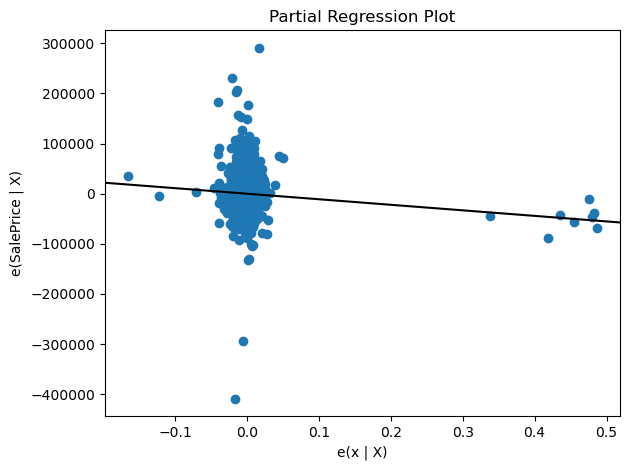

Generating partial regression plot for LotArea...


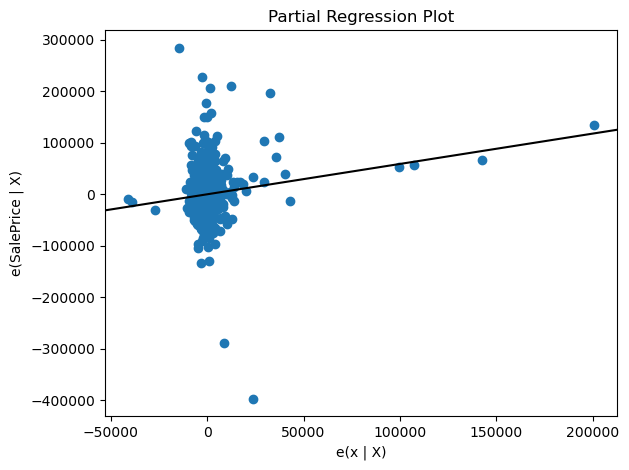

Generating partial regression plot for GrLivArea...


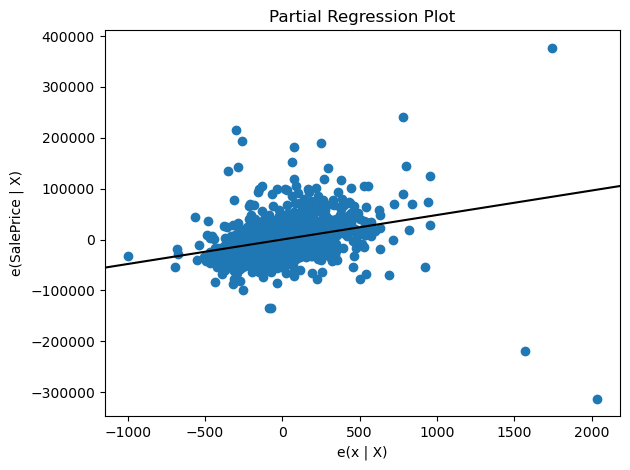

Generating partial regression plot for GarageArea...


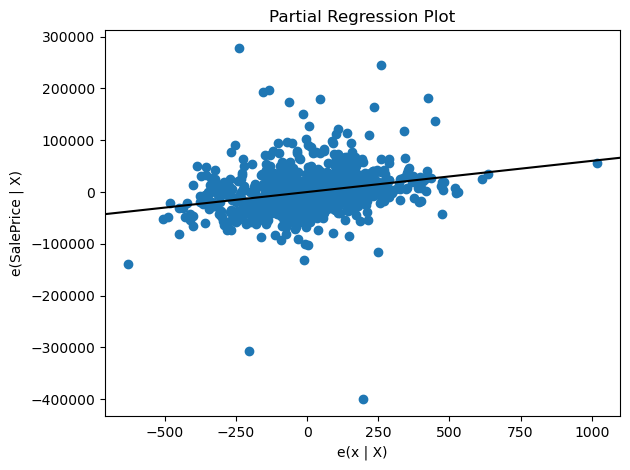

Generating partial regression plot for TotRmsAbvGrd...


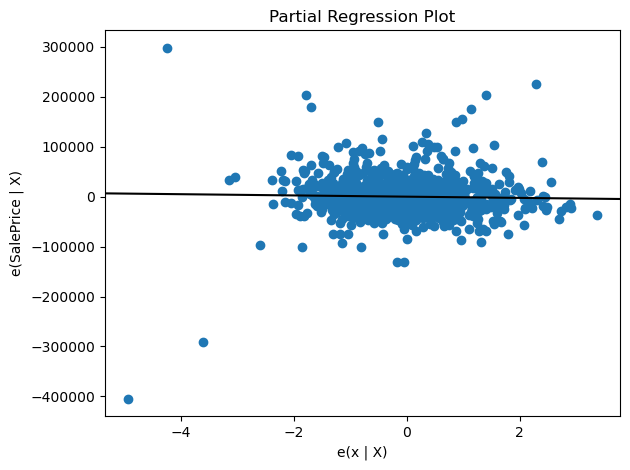

Generating partial regression plot for MSSubClass...


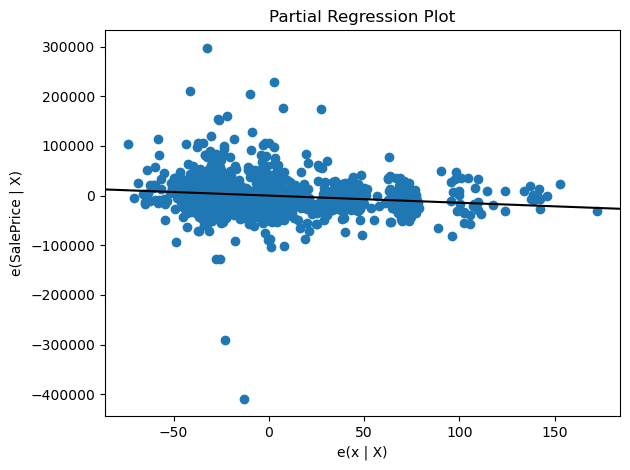

Generating partial regression plot for OverallQual...


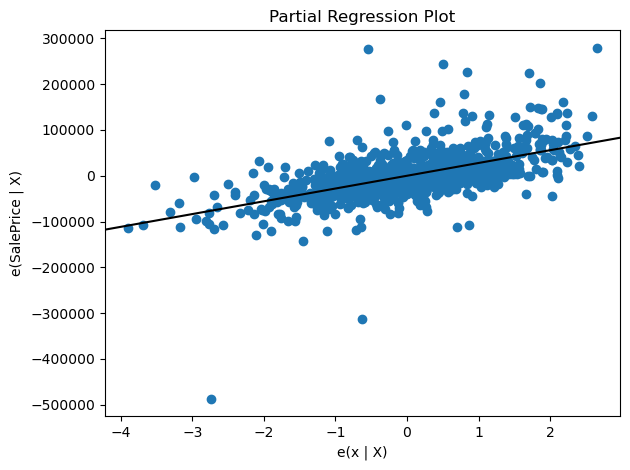

Generating partial regression plot for OverallCond...


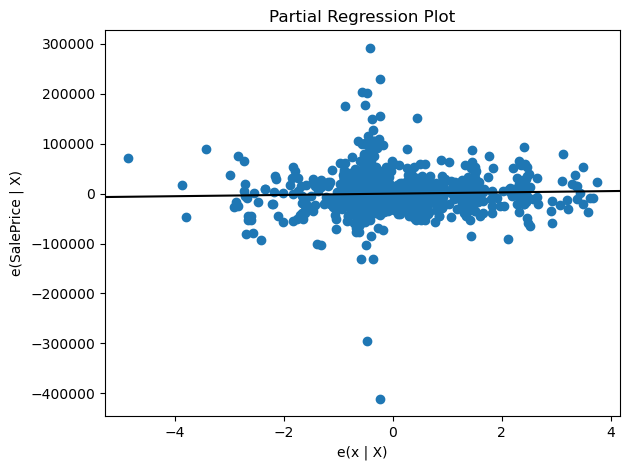

Generating partial regression plot for MSZoning_FV...


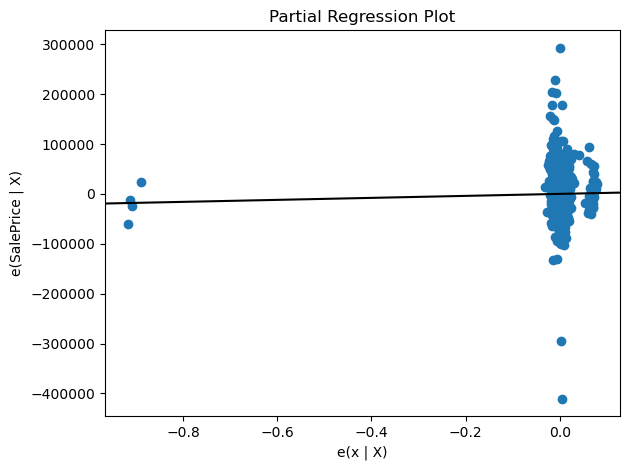

Generating partial regression plot for MSZoning_RH...


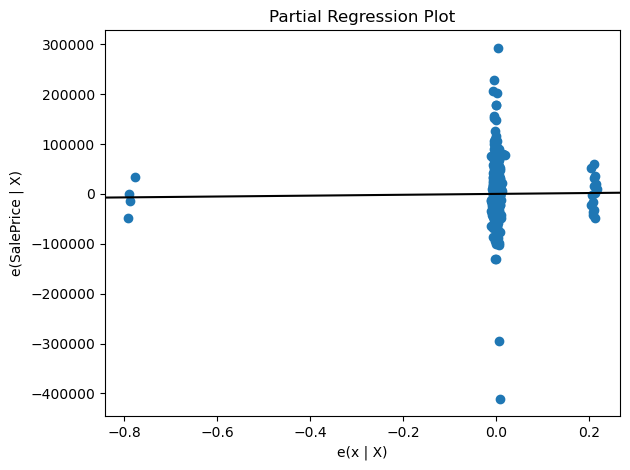

Generating partial regression plot for MSZoning_RL...


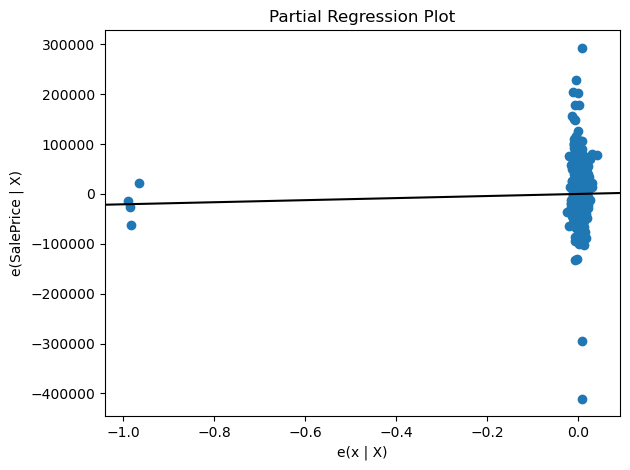

Generating partial regression plot for MSZoning_RM...


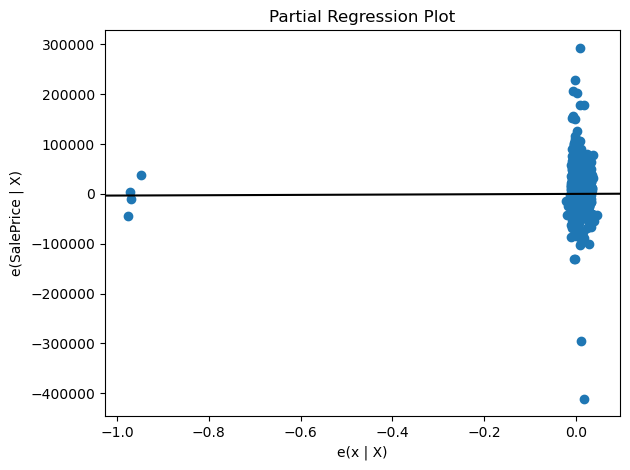

Generating partial regression plot for Street_Pave...


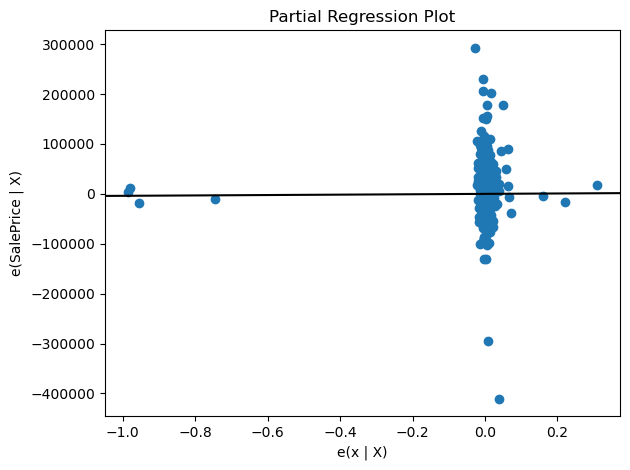

In [22]:
# Your code here - create partial regression plots
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Prepare X and y
X = ames[['LotArea', 'GrLivArea', 'GarageArea', 'TotRmsAbvGrd', 'MSSubClass', 'OverallQual', 'OverallCond', 'MSZoning', 'Street']]
y = ames['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually apply one-hot encoding to categorical columns using pandas.get_dummies
X_train_transformed = pd.get_dummies(X_train, drop_first=True)

# Ensure no missing values in the transformed data
X_train_transformed = X_train_transformed.fillna(0)  # Fill missing values with 0

# Convert boolean columns to integers (1 for True, 0 for False)
bool_columns = X_train_transformed.select_dtypes(include='bool').columns
X_train_transformed[bool_columns] = X_train_transformed[bool_columns].astype(int)

# Check if all columns are numeric
print(X_train_transformed.dtypes)

# Add a constant for the intercept
X_train_transformed = sm.add_constant(X_train_transformed)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train_transformed).fit()

# Create partial regression plots for each feature
def plot_partial_regression(model, X_train_transformed, feature):
    fig = sm.graphics.plot_partregress(
        endog=y_train,   # Dependent variable
        exog_i=feature,  # Current feature
        exog_others=X_train_transformed.drop(columns=[feature]),  # All other features
        data=X_train_transformed,  # The transformed dataset with the constant
        obs_labels=False  # Disable observation labels
    )
    plt.tight_layout()
    plt.show()

# Generate partial regression plots for each feature, making sure to reference the correct feature names
for feature in X_train_transformed.columns:
    print(f"Generating partial regression plot for {feature}...")
    plot_partial_regression(model, X_train_transformed, feature)


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [23]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict using the trained model
y_train_pred = model.predict(X_train_transformed)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 1451884758.4430015
Root Mean Squared Error (RMSE): 38103.605583238466
Mean Absolute Error (MAE): 24745.197978322005


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here
# The RMSE is a measure of the average magnitude of the errors in a set of predictions, without considering their direction.
#The model provides insights into the relationship between predictors and the target variable, with error metrics showing how well it predicts; to improve, focus on feature selection, handling outliers, and exploring more complex models.


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [27]:
# Your code here
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

# Define X and y
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for imputation and scikit-learn linear regression with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numeric values with the mean
            ('scaler', 'passthrough')
        ]), X.select_dtypes(include=['int64', 'float64']).columns),
        
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         X.select_dtypes(include=['object']).columns)
    ]
)

# Define the model pipeline
model_sklearn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the scikit-learn model
model_sklearn.fit(X_train, y_train)

# Get predictions and coefficients for sklearn
sklearn_predictions = model_sklearn.predict(X_test)
sklearn_coefficients = model_sklearn.named_steps['regressor'].coef_

# Now fit the statsmodels OLS model (same preprocessed data)
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed = sm.add_constant(X_train_transformed)  # Add constant column for intercept

model_statsmodels = sm.OLS(y_train, X_train_transformed).fit()

# Get statsmodels predictions and coefficients
statsmodels_predictions = model_statsmodels.predict(X_train_transformed)
statsmodels_coefficients = model_statsmodels.params

# Compare coefficients
coefficients_comparison = pd.DataFrame({
    'Feature': model_sklearn.named_steps['preprocessor'].get_feature_names_out(),
    'sklearn_coef': sklearn_coefficients,
    'statsmodels_coef': statsmodels_coefficients[1:]  # Exclude intercept from statsmodels
})

# Display the comparison and residuals for further investigation
coefficients_comparison.head(), sklearn_predictions[:5], statsmodels_predictions[:5]


/Users/brianrono/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [14, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(             Feature  sklearn_coef  statsmodels_coef
 x1   num__MSSubClass     15.213732         15.213732
 x2  num__LotFrontage     17.816137         17.816137
 x3      num__LotArea      0.737957          0.737957
 x4  num__OverallQual   6768.312940       6768.312940
 x5  num__OverallCond   5200.009966       5200.009966,
 array([160158.81593061, 343147.43926948,  90047.89403105, 176477.87401766,
        321273.07442369]),
 array([144848.3392393 , 169676.40439709,  95416.46411296, 165260.9098327 ,
        170518.34215999]))

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.